In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
match_df = pd.read_csv('IPL Matches 2008-2020.csv')
ball_by_ball_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [3]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,28-09-2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,05-11-2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,06-11-2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,08-11-2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
match_df['date'] = pd.to_datetime(match_df['date'], format='%d-%m-%Y')

In [6]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

In [7]:
ball_by_ball_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [8]:
ball_by_ball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [9]:
# no of matches played so far

match_df['id'].nunique()

816

In [10]:
# all cities where matches have been played till date

match_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [11]:
# all teams that have participated till now

match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [12]:
match_df['season'] = match_df['date'].dt.year
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [13]:
matches_per_season = match_df.groupby('season', as_index=False)['id'].count().rename(columns = {'id' : 'no of matches'})
matches_per_season

,season,no of matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Matches per Season')

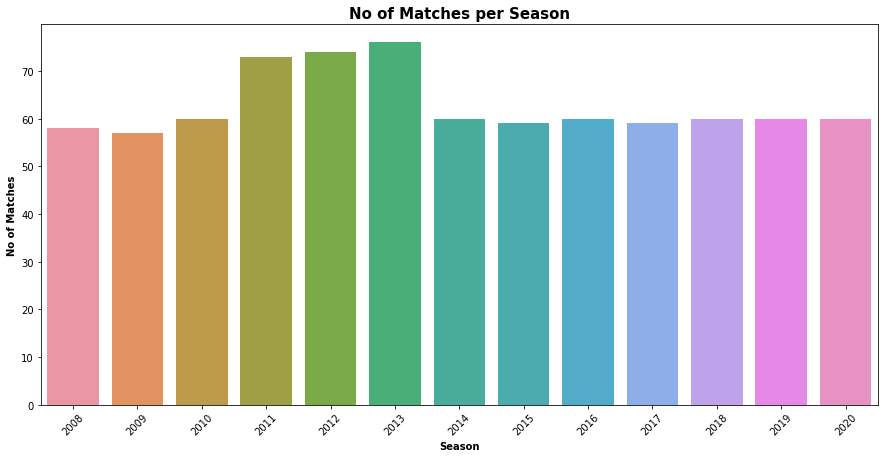

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(match_df['season'])
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Season', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Matches', fontsize = 10, fontweight = 'bold')
plt.title('No of Matches per Season', fontsize = 15, fontweight = 'bold')

In [15]:
season_df = match_df[['id', 'season']].merge(ball_by_ball_df, on = 'id', how = 'left')
season_df

,id,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


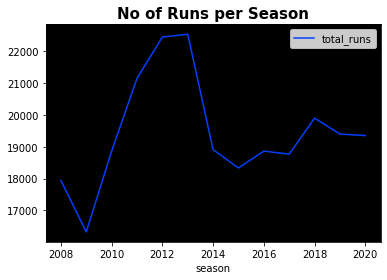

In [16]:
season = season_df.groupby('season', as_index = False)['total_runs'].sum()
p = season.set_index('season')
ax = plt.axes()
ax.set(facecolor = 'black')
sns.lineplot(data = p, palette = 'bright')
plt.title('No of Runs per Season', fontsize = 15, fontweight = 'bold')
plt.show()

In [17]:
runs_per_season = pd.merge(season, matches_per_season, on = 'season')
runs_per_season['runs_per_match'] = runs_per_season['total_runs']/runs_per_season['no of matches']
runs_per_season

,season,total_runs,no of matches,runs_per_match
0,2008,17937,58,309.258621
1,2009,16320,57,286.315789
2,2010,18864,60,314.400000
3,2011,21154,73,289.780822
4,2012,22453,74,303.418919
5,2013,22541,76,296.592105
6,2014,18909,60,315.150000
7,2015,18332,59,310.711864
8,2016,18862,60,314.366667
9,2017,18769,59,318.118644


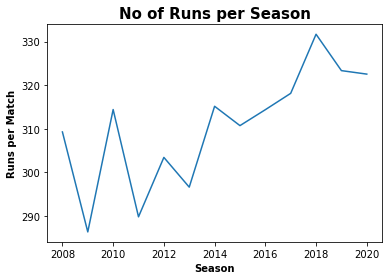

In [18]:
sns.lineplot(x = 'season', y = 'runs_per_match', data = runs_per_season, palette = 'bright')
plt.xlabel('Season', fontsize = 10, fontweight = 'bold')
plt.ylabel('Runs per Match', fontsize = 10, fontweight = 'bold')
plt.title('No of Runs per Season', fontsize = 15, fontweight = 'bold')
plt.show()

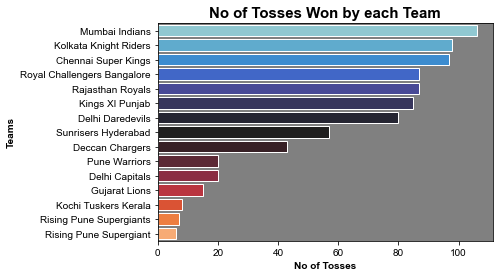

In [19]:
toss = match_df['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.set(rc = {'figure.figsize' : (15, 10)}, style = 'darkgrid')
sns.barplot(x = toss, y = toss.index, orient = 'h', palette = 'icefire', saturation = 1)
plt.title('No of Tosses Won by each Team', fontsize = 15, fontweight = 'bold')
plt.xlabel('No of Tosses', fontsize = 10, fontweight = 'bold')
plt.ylabel('Teams', fontsize = 10, fontweight = 'bold')
plt.show()

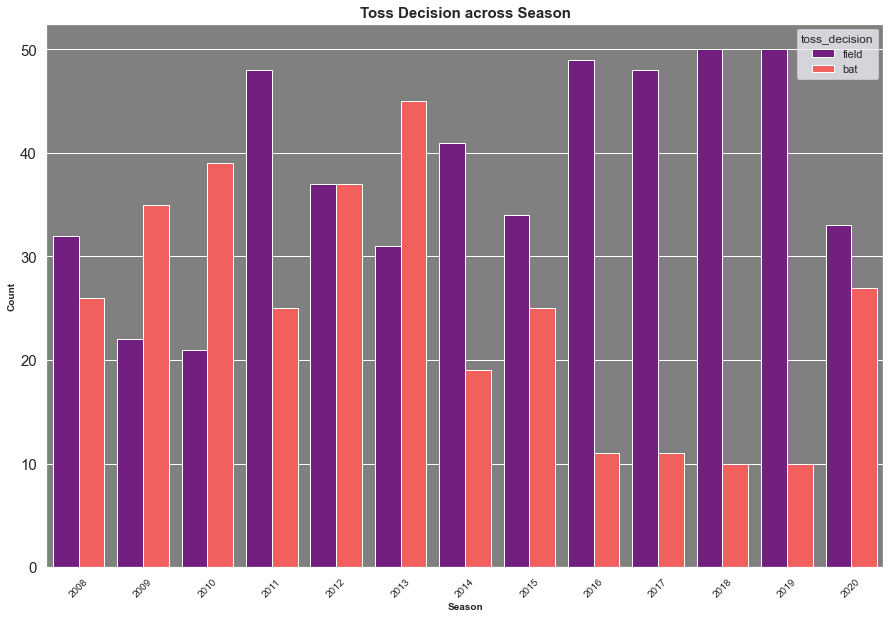

In [20]:
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.countplot(x = 'season', hue = 'toss_decision', data = match_df, palette = 'magma', saturation = 1)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 15)
plt.title('Toss Decision across Season', fontsize = 15, fontweight = 'bold')
plt.xlabel('Season', fontsize = 10, fontweight = 'bold')
plt.ylabel('Count', fontsize = 10, fontweight = 'bold')
plt.show()

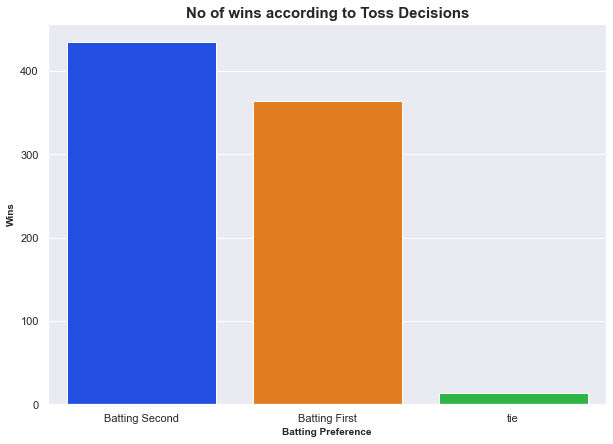

In [21]:
result = match_df['result'].value_counts().rename(index = { 'wickets' : 'Batting Second', 'runs' : 'Batting First' })
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(x = result.index, y = result, palette = 'bright')
plt.xlabel('Batting Preference', fontsize = 10, fontweight = 'bold')
plt.ylabel('Wins', fontsize = 10, fontweight = 'bold')
plt.title('No of wins according to Toss Decisions', fontsize = 15, fontweight = 'bold')
plt.show()

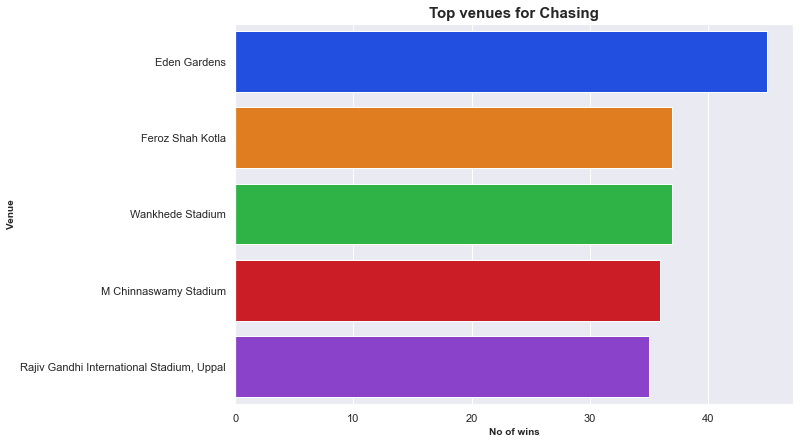

In [22]:
chasing_venues = match_df.loc[match_df['result'] == 'wickets', 'venue'].value_counts().head(5)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = chasing_venues.index, x = chasing_venues, orient = 'h', palette = 'bright')
plt.xlabel('No of wins', fontsize = 10, fontweight = 'bold')
plt.ylabel('Venue', fontsize = 10, fontweight = 'bold')
plt.title('Top venues for Chasing', fontsize = 15, fontweight = 'bold')
plt.show()

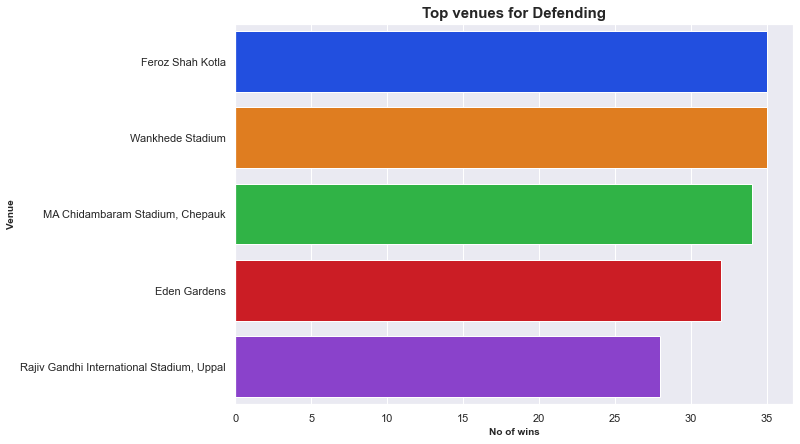

In [23]:
defending_venues = match_df.loc[match_df['result'] == 'runs', 'venue'].value_counts().head(5)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = defending_venues.index, x = defending_venues, orient = 'h', palette = 'bright')
plt.xlabel('No of wins', fontsize = 10, fontweight = 'bold')
plt.ylabel('Venue', fontsize = 10, fontweight = 'bold')
plt.title('Top venues for Defending', fontsize = 15, fontweight = 'bold')
plt.show()

In [24]:
# top venues where mumbai indians wins after winning the toss

filt = (match_df['toss_winner'] == 'Mumbai Indians') & (match_df['winner'] == 'Mumbai Indians')
match_df.loc[filt, 'venue'].value_counts().head(5)

Wankhede Stadium              23
M Chinnaswamy Stadium          6
Brabourne Stadium              5
Eden Gardens                   4
Dr DY Patil Sports Academy     2
Name: venue, dtype: int64

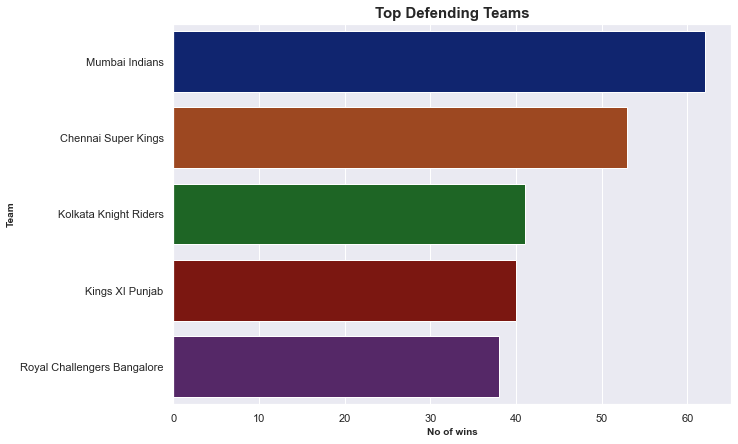

In [25]:
filt = match_df['result'] == 'runs'
top_defending_teams = match_df.loc[filt, 'winner'].value_counts().head(5)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = top_defending_teams.index, x = top_defending_teams, orient = 'h', palette = 'dark')
plt.xlabel('No of wins', fontsize = 10, fontweight = 'bold')
plt.ylabel('Team', fontsize = 10, fontweight = 'bold')
plt.title('Top Defending Teams', fontsize = 15, fontweight = 'bold')
plt.show()

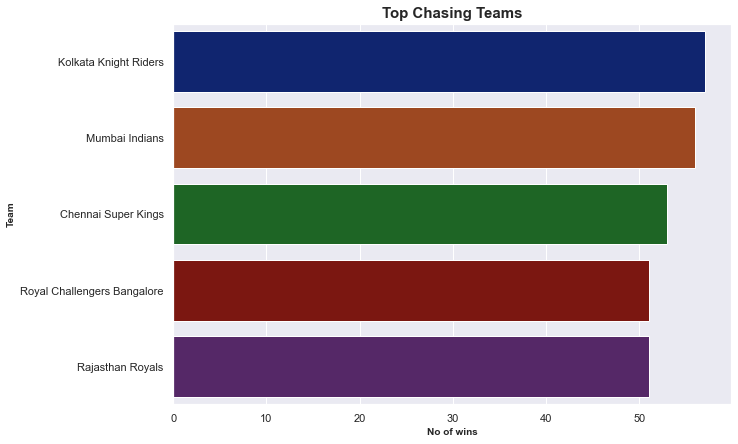

In [26]:
filt = match_df['result'] == 'wickets'
top_chasing_teams = match_df.loc[filt, 'winner'].value_counts().head(5)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = top_chasing_teams.index, x = top_chasing_teams, orient = 'h', palette = 'dark')
plt.xlabel('No of wins', fontsize = 10, fontweight = 'bold')
plt.ylabel('Team', fontsize = 10, fontweight = 'bold')
plt.title('Top Chasing Teams', fontsize = 15, fontweight = 'bold')
plt.show()

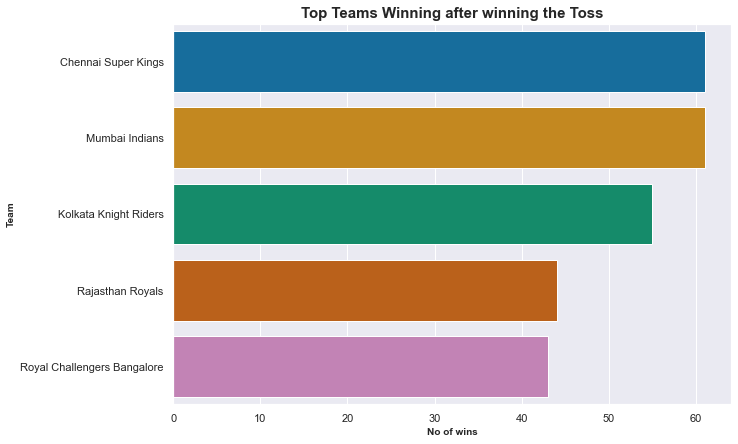

In [27]:
filt = match_df['toss_winner'] == match_df['winner']
toss_and_match = match_df.loc[filt, 'winner'].value_counts().head(5)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = toss_and_match.index, x = toss_and_match, orient = 'h', palette = 'colorblind')
plt.xlabel('No of wins', fontsize = 10, fontweight = 'bold')
plt.ylabel('Team', fontsize = 10, fontweight = 'bold')
plt.title('Top Teams Winning after winning the Toss', fontsize = 15, fontweight = 'bold')
plt.show()

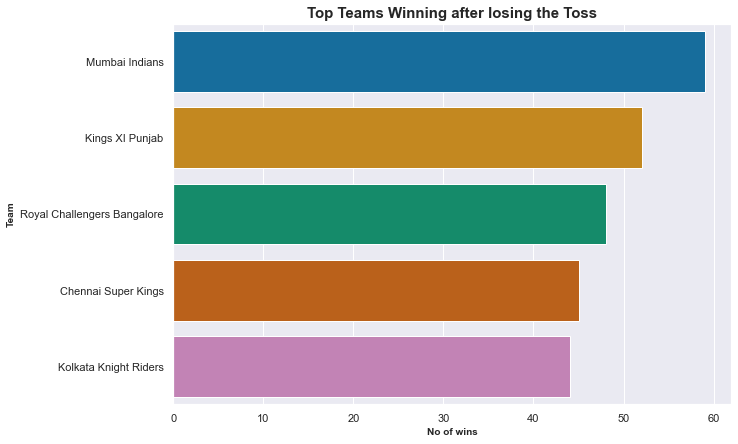

In [28]:
filt = match_df['toss_winner'] != match_df['winner']
not_toss_and_match = match_df.loc[filt, 'winner'].value_counts().head(5)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = not_toss_and_match.index, x = not_toss_and_match, orient = 'h', palette = 'colorblind')
plt.xlabel('No of wins', fontsize = 10, fontweight = 'bold')
plt.ylabel('Team', fontsize = 10, fontweight = 'bold')
plt.title('Top Teams Winning after losing the Toss', fontsize = 15, fontweight = 'bold')
plt.show()

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


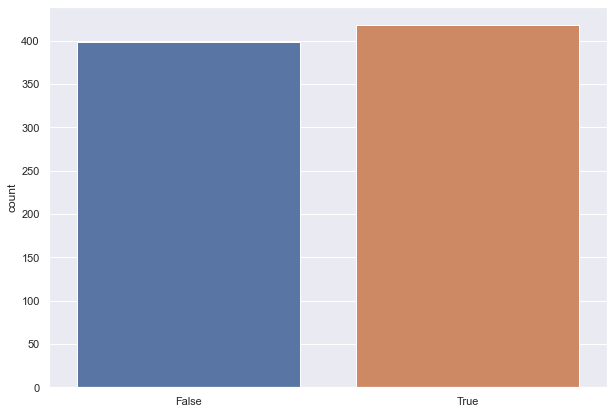

In [29]:
# toss_matters
toss_matters = match_df['toss_winner'] == match_df['winner']
sns.countplot(toss_matters)
plt.show()

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


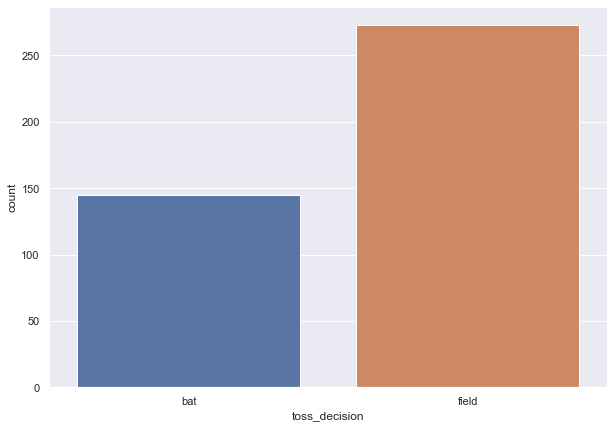

In [30]:
# what to prefer after winning tosses to win the match

filt = match_df['toss_winner'] == match_df['winner']
toss_preference = match_df.loc[filt, 'toss_decision']
sns.countplot(toss_preference)
plt.show()

In [31]:
# biggest win

match_df.loc[match_df['result_margin'] == match_df['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


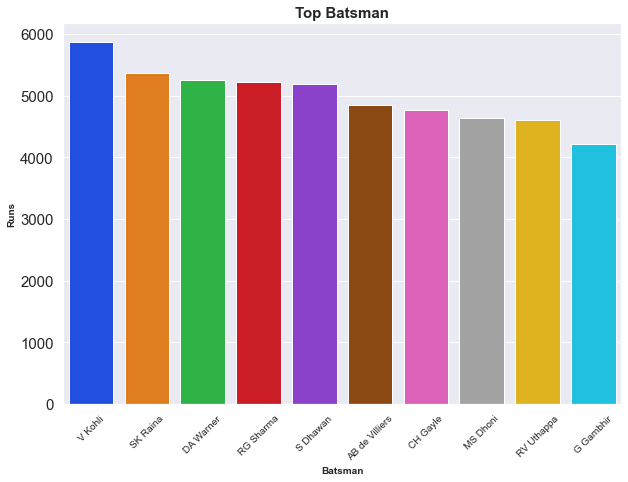

In [32]:
top_batsman = ball_by_ball_df.groupby('batsman', as_index = False)['batsman_runs'].sum().sort_values('batsman_runs', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = top_batsman['batsman_runs'] , x = top_batsman['batsman'], palette = 'bright')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Batsman', fontsize = 10, fontweight = 'bold')
plt.ylabel('Runs', fontsize = 10, fontweight = 'bold')
plt.title('Top Batsman', fontsize = 15, fontweight = 'bold')
plt.show()

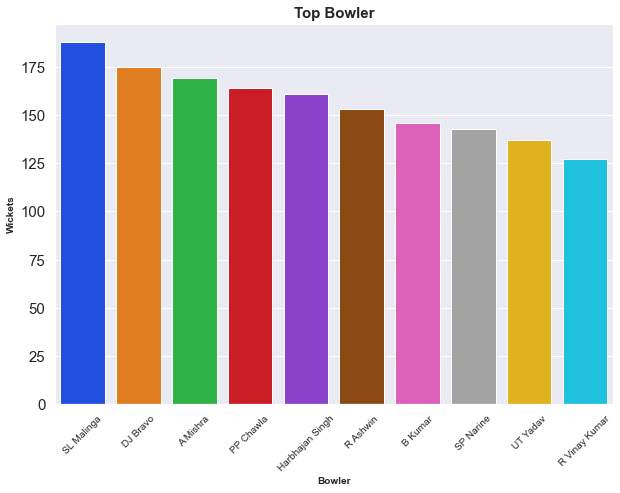

In [33]:
top_bowler = ball_by_ball_df.groupby('bowler', as_index = False)['is_wicket'].sum().sort_values('is_wicket', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = top_bowler['is_wicket'] , x = top_bowler['bowler'], palette = 'bright')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Bowler', fontsize = 10, fontweight = 'bold')
plt.ylabel('Wickets', fontsize = 10, fontweight = 'bold')
plt.title('Top Bowler', fontsize = 15, fontweight = 'bold')
plt.show()

In [34]:
match_df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


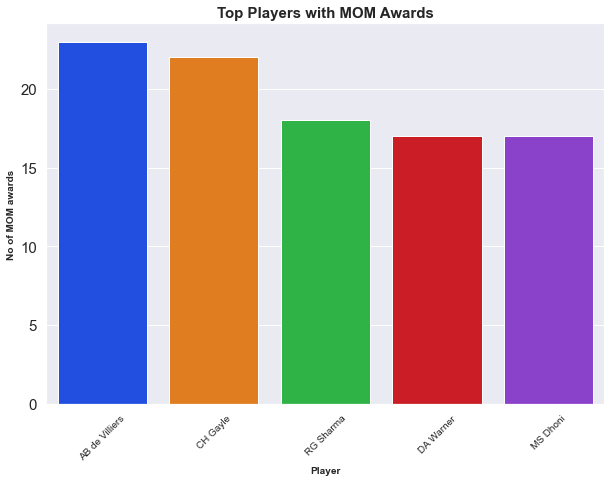

In [35]:
top_mom_awards = match_df['player_of_match'].value_counts().reset_index().head(5)
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = top_mom_awards['player_of_match'] , x = top_mom_awards['index'], palette = 'bright')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Player', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of MOM awards', fontsize = 10, fontweight = 'bold')
plt.title('Top Players with MOM Awards', fontsize = 15, fontweight = 'bold')
plt.show()

## Virat Kohli Analysis

In [36]:
filt = ball_by_ball_df['batsman'] == 'V Kohli'
kohli_df = ball_by_ball_df.loc[filt]
kohli_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192772,1237178,1,0,5,V Kohli,D Padikkal,Sandeep Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192773,1237178,1,0,6,V Kohli,D Padikkal,Sandeep Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192774,1237178,1,1,1,V Kohli,D Padikkal,JO Holder,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
192775,1237178,1,1,2,V Kohli,D Padikkal,JO Holder,0,0,0,0,1,caught,V Kohli,SP Goswami,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad


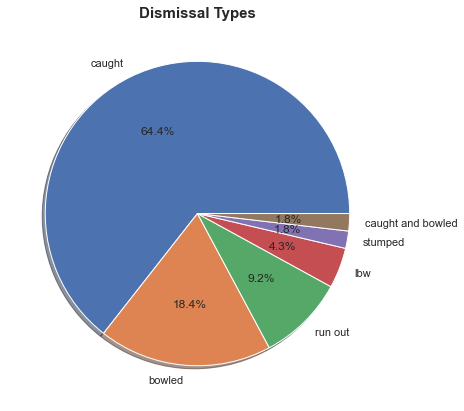

In [37]:
dismissal_types = kohli_df['dismissal_kind'].value_counts()
plt.pie(dismissal_types, labels = dismissal_types.index, autopct = '%1.1f%%', shadow = True)
plt.title('Dismissal Types', fontsize = 15, fontweight = 'bold')
plt.show()

In [38]:
runs_types = kohli_df['batsman_runs'].value_counts().reset_index()
runs_types['total runs'] = runs_types['index'] * runs_types['batsman_runs']
runs_types['index'] = runs_types['index'].astype(str) + "'s"
runs_types = runs_types.rename(columns = {'index' : 'types', 'batsman_runs' : 'counts'})
runs_types

,types,counts,total runs
0,1's,1919,1919
1,0's,1625,0
2,4's,504,2016
3,2's,346,692
4,6's,202,1212
5,3's,13,39


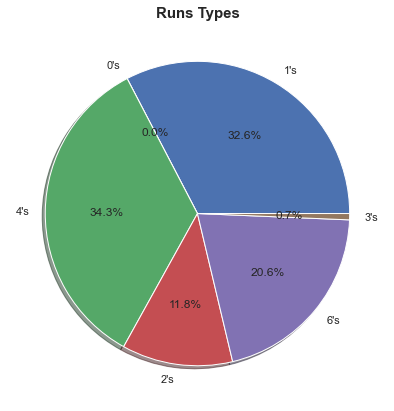

In [39]:
plt.pie(runs_types['total runs'], labels = runs_types['types'], autopct = '%1.1f%%', shadow = True)
plt.title('Runs Types', fontsize = 15, fontweight = 'bold')
plt.show()

In [40]:
# total runs

runs_types['total runs'].sum()

5878

In [44]:
kohli_df = match_df[['id', 'season']].merge(kohli_df, on = 'id')
kohli_df

,id,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,2008,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
1,335982,2008,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
2,335982,2008,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
3,335982,2008,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
4,335982,2008,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4604,1237178,2020,1,0,5,V Kohli,D Padikkal,Sandeep Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
4605,1237178,2020,1,0,6,V Kohli,D Padikkal,Sandeep Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
4606,1237178,2020,1,1,1,V Kohli,D Padikkal,JO Holder,2,0,2,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
4607,1237178,2020,1,1,2,V Kohli,D Padikkal,JO Holder,0,0,0,0,1,caught,V Kohli,SP Goswami,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad


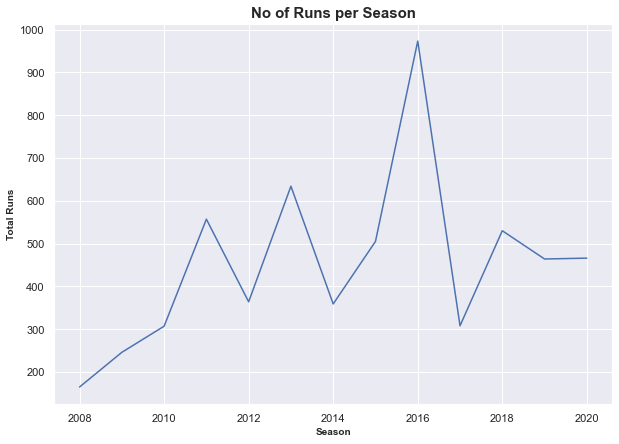

In [46]:
runs_per_season = kohli_df.groupby('season', as_index = False)['batsman_runs'].sum()
sns.lineplot(x = 'season', y = 'batsman_runs', data = runs_per_season, palette = 'bright')
plt.xlabel('Season', fontsize = 10, fontweight = 'bold')
plt.ylabel('Total Runs', fontsize = 10, fontweight = 'bold')
plt.title('No of Runs per Season', fontsize = 15, fontweight = 'bold')
plt.show()

In [53]:
# highest scores

kohli_df.groupby('id')['batsman_runs'].sum().sort_values(ascending = False).iloc[0:5].values

array([113, 109, 108, 100, 100], dtype=int64)

In [58]:
# total man of the match awards

filt = match_df['player_of_match'] == 'V Kohli'
mom = match_df.loc[filt]
mom['player_of_match'].count()

13

In [60]:
# season wise man of the match awards

mom_per_season = mom.groupby('season', as_index = False)['player_of_match'].count()
mom_per_season

,season,player_of_match
0,2011,2
1,2013,3
2,2015,1
3,2016,5
4,2019,1
5,2020,1


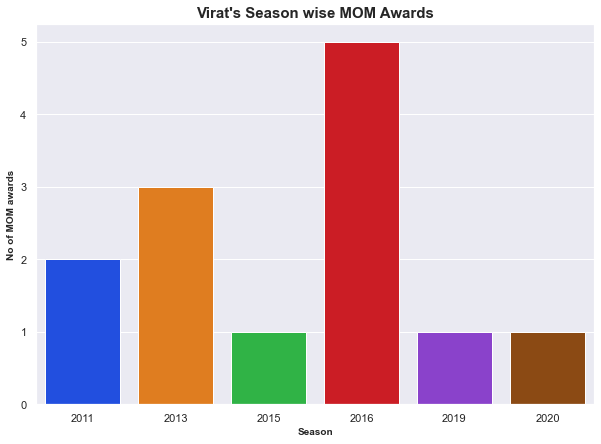

In [62]:
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.barplot(y = mom_per_season['player_of_match'] , x = mom_per_season['season'], palette = 'bright')
plt.xlabel('Season', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of MOM awards', fontsize = 10, fontweight = 'bold')
plt.title("Virat's Season wise MOM Awards", fontsize = 15, fontweight = 'bold')
plt.show()

In [80]:
runs = kohli_df.groupby('season', as_index = False)['batsman_runs'].sum()
balls = kohli_df.groupby('season', as_index = False).size()
strike_rate = pd.merge(runs, balls, on = 'season')
strike_rate['S/R'] = 100 * (strike_rate['batsman_runs'] / strike_rate['size'])
strike_rate['S/R'] = strike_rate['S/R'].round(2)
strike_rate

,season,batsman_runs,size,S/R
0,2008,165,168,98.21
1,2009,246,225,109.33
2,2010,307,216,142.13
3,2011,557,473,117.76
4,2012,364,333,109.31
5,2013,634,469,135.18
6,2014,359,301,119.27
7,2015,505,395,127.85
8,2016,973,655,148.55
9,2017,308,257,119.84


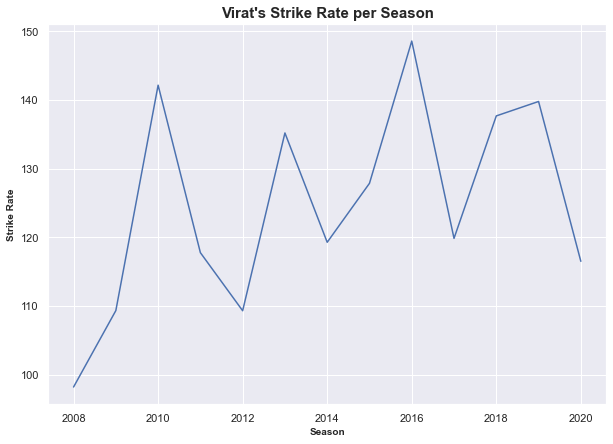

In [81]:
sns.set(rc = {'figure.figsize' : (10, 7)}, style = 'darkgrid')
sns.lineplot(y = strike_rate['S/R'] , x = strike_rate['season'], palette = 'bright')
plt.xlabel('Season', fontsize = 10, fontweight = 'bold')
plt.ylabel('Strike Rate', fontsize = 10, fontweight = 'bold')
plt.title("Virat's Strike Rate per Season", fontsize = 15, fontweight = 'bold')
plt.show()